In [1]:
import pandas as pd
import datetime
import numpy as np
import yfinance as yf
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import datapackage

c:\Users\juan\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_info = table[0]
df_info.to_csv('S&P500-Info.csv')
lista = df_info['Symbol'].tolist()
lista = [c.replace('.', '-') for c in lista]
lista

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCS

In [3]:
df_list = list()
for ticker in lista:
    data = yf.download(ticker, start='2000-01-02', end= '2022-01-01', group_by="Ticker",progress=False)
    data['ticker'] = ticker 
    data["return_gap"]=np.log(data["Open"]/data["Close"].shift(1)).fillna(0)
    df_list.append(data)
    
df = pd.concat(df_list)


1 Failed download:
- CEG: Data doesn't exist for startDate = 946782000, endDate = 1641006000


In [2]:
df.to_parquet("sp500",engine="fastparquet")

NameError: name 'df' is not defined

In [3]:
sp500=pd.read_parquet("sp500")

In [4]:
sp500.fillna(0,inplace=True)

EJERCICIO 1:mejor día para invertir teniendo en cuenta el retorno de los movimiento gap

In [5]:
sp500['Date'] = sp500.index
sp500['Date'] = sp500['Date'].dt.date 
sp500['Date'] = pd.to_datetime(sp500['Date'], errors='coerce')
sp500['Day of Week'] = sp500['Date'].dt.day_name()
sp500["Number of Day"]=sp500["Date"].dt.dayofweek

In [6]:
Day=sp500[["Day of Week","Number of Day"]]
Day.reset_index(inplace=True)
Day.drop(columns="Date",inplace=True)
Day.drop_duplicates(inplace=True)

C:\Users\juan\AppData\Local\Temp\ipykernel_20604\3443113813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Day.drop(columns="Date",inplace=True)
C:\Users\juan\AppData\Local\Temp\ipykernel_20604\3443113813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Day.drop_duplicates(inplace=True)


In [7]:
k=sp500.groupby(by=["Day of Week"]).mean()
k.reset_index(inplace=True)
k.drop(columns=["Number of Day"],inplace=True)
k=pd.merge(k,Day,on="Day of Week")
k=k.sort_values(by=["Number of Day"])


In [8]:
k

,Day of Week,Open,High,Low,Close,Adj Close,Volume,return_gap,Number of Day
1,Monday,70.059196,70.843901,69.234033,70.048704,61.833624,5.777623e+06,0.000041,0
3,Tuesday,70.119309,70.916968,69.298505,70.118692,61.893904,6.140266e+06,0.000578,1
4,Wednesday,69.936784,70.758576,69.107335,69.949880,61.713213,6.329545e+06,0.000116,2
2,Thursday,70.059253,70.899329,69.228545,70.101825,61.867673,6.347015e+06,0.000057,3
0,Friday,69.954963,70.722772,69.143238,69.966344,61.721274,6.220898e+06,0.000221,4


In [9]:
dias =k["Day of Week"]
retornos = k["return_gap"]

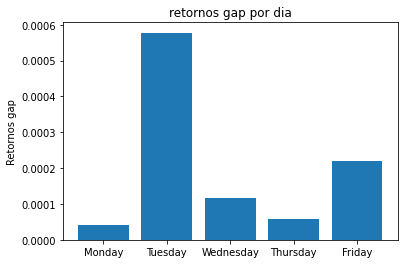

In [10]:
fig, ax = plt.subplots()
ax.set_ylabel('Retornos gap')
ax.set_title('retornos gap por dia')
plt.bar(dias, retornos)
plt.savefig('barras_simple.png')
plt.show()

RTA: El mejor dia para invertir es el Martes si se tiene en cuenta el retorno gap

EJERCICIO 2:mejor día para invertir teniendo en cuenta el retorno de los movimientos intradiarios

In [13]:
retornos_intra = np.log(k['Close']/k['Open']).fillna(0)
retornos_intra

1   -0.000150
3   -0.000009
4    0.000187
2    0.000607
0    0.000163
dtype: float64

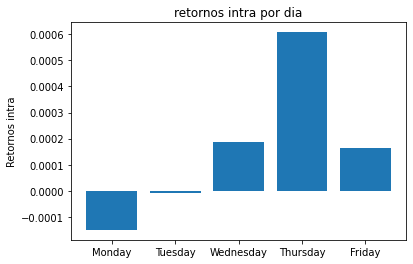

In [14]:
fig, ax = plt.subplots()
ax.set_ylabel('Retornos intra')
ax.set_title('retornos intra por dia')
plt.bar(dias, retornos_intra)
plt.savefig('barras_simple.png')
plt.show()

RTA: El mejor dia para invertir si se toma en cuenta el retorno intradiario es el jueves

EJERCICIO 3:las mejores industrias que pertenecen al SP500 en las cuales se puede invertir

In [15]:
industrias=pd.read_csv("S&P500-Info.csv")
lista_ind=industrias["GICS Sector"].value_counts()

In [16]:
lista_ind

Information Technology    74
Industrials               73
Financials                66
Health Care               64
Consumer Discretionary    58
Consumer Staples          33
Real Estate               31
Utilities                 29
Materials                 28
Communication Services    26
Energy                    21
Name: GICS Sector, dtype: int64

<AxesSubplot:xlabel='count', ylabel='GICS Sector'>

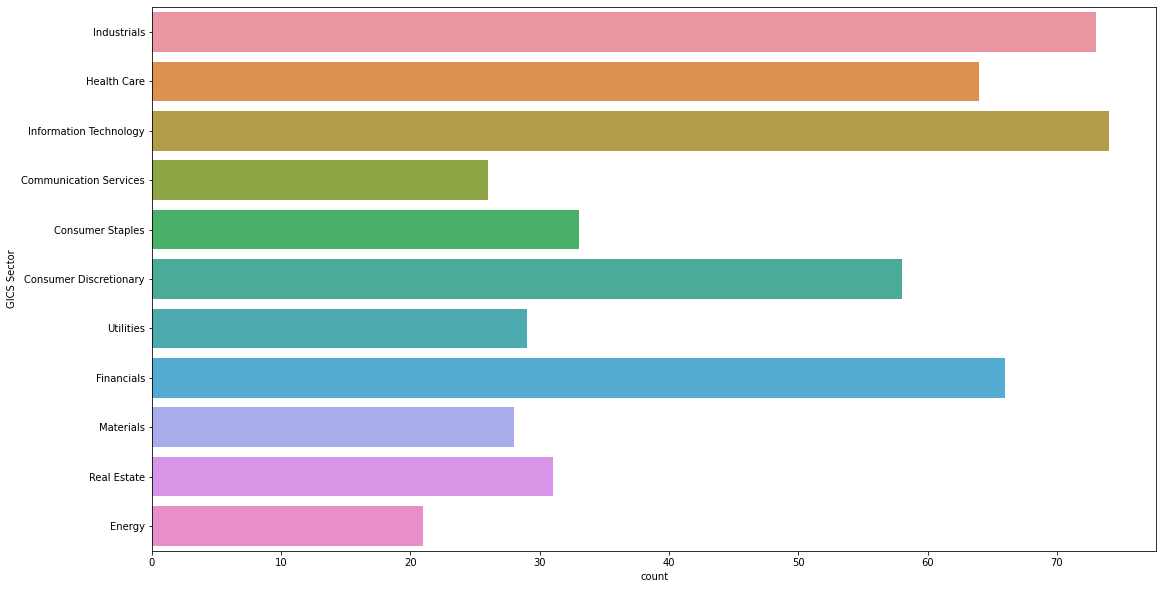

In [17]:
plt.figure(figsize=(18,10))
sns.countplot(y="GICS Sector",data=industrias)


RTA: Las mejores industrias para invertir son las de tecnologia, las industriales y las de finanzas principalmente basandose en que son de las que más hay en el S&P500, ademas que en los ultimos años y en conjunto con la pandemia la industria tecnologica crecio exponencialmente

EJERCICIO 4:los momentos de alta volatilidad que afectaron al SP500

In [18]:
data_url = 'https://datahub.io/core/finance-vix/datapackage.json'
package = datapackage.Package(data_url)
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])

In [19]:
data

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,2004-01-02,17.96,18.68,17.54,18.22
1,2004-01-05,18.45,18.49,17.44,17.49
2,2004-01-06,17.66,17.67,16.19,16.73
3,2004-01-07,16.72,16.75,15.50,15.50
4,2004-01-08,15.42,15.68,15.32,15.61
...,...,...,...,...,...
4194,2020-08-31,23.91,26.50,21.77,26.41
4195,2020-09-01,25.86,26.59,25.02,26.12
4196,2020-09-02,26.01,27.07,25.53,26.57
4197,2020-09-03,26.28,35.94,25.66,33.60


In [20]:
volatilidad=(data.sort_values(by=('VIX High'),ascending= False))

In [21]:
volatilidad

,Date,VIX Open,VIX High,VIX Low,VIX Close
1212,2008-10-24,67.80,89.53,67.80,79.13
4079,2020-03-18,69.37,85.47,69.37,76.45
4078,2020-03-17,82.69,84.83,70.37,75.91
4080,2020-03-19,80.62,84.26,68.57,72.00
4077,2020-03-16,57.83,83.56,57.83,82.69
...,...,...,...,...,...
3525,2018-01-03,9.56,9.65,8.94,9.15
3464,2017-10-05,9.48,9.62,9.13,9.19
3527,2018-01-05,9.10,9.54,9.00,9.22
3413,2017-07-25,9.40,9.52,9.04,9.43


RTA: Las 10 fechas con mas volatilidad

In [22]:
volatilidad["Date"].head(10)

1212    2008-10-24
4079    2020-03-18
4078    2020-03-17
4080    2020-03-19
4077    2020-03-16
1213    2008-10-27
1231    2008-11-20
1206    2008-10-16
1232    2008-11-21
1211    2008-10-23
Name: Date, dtype: object

In [23]:
volatilidad['Date'] = pd.DatetimeIndex(volatilidad['Date'])

In [24]:
fig = go.Figure()

fig.add_trace(go.Candlestick(x=volatilidad["Date"], # x=msft.index.strftime("%y/%m/%d") # para evitar trazar los dias sin dato
                            open=volatilidad["VIX Open"],
                            high=volatilidad["VIX High"],
                            low=volatilidad["VIX Low"],
                            close=volatilidad["VIX Close"],
                            increasing_line_color = 'green',
                            decreasing_line_color = 'red'))
fig.update_layout(xaxis_rangeslider_visible=False) #para ocultar la barra de abajo
fig.show()

<AxesSubplot:xlabel='Date', ylabel='VIX High'>

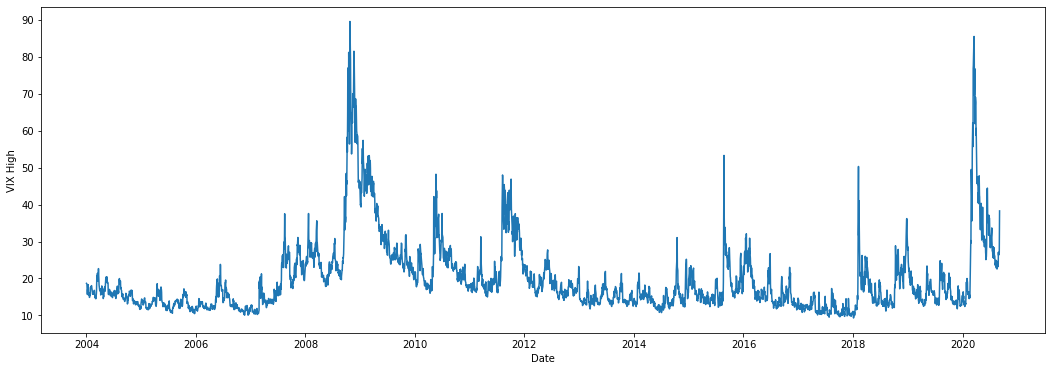

In [25]:
plt.figure(figsize=(18,6))
x=sns.lineplot(x="Date",y="VIX High",data=volatilidad)
x

EJERCICIO 5: 9 MEJORES EMPRESAS PARA INVERTIR EN LA SITUACION ECONOMICA ACTUAL

In [26]:
df_list = list()
for ticker in lista:
    data = yf.download(ticker, start='2021-06-29', end= '2022-06-30', group_by="Ticker",progress=False)
    data['ticker'] = ticker 
    df_list.append(data)

df2 = pd.concat(df_list)

In [27]:

df2['variaciones'] = df2['Adj Close'].pct_change()
df2['volatilidad'] = (df2.variaciones.rolling(252).std()*(252)**0.5)*100

In [28]:
volatilidades=df2.groupby(by="ticker").mean().sort_values(by="volatilidad",ascending=True)

In [29]:
definitivo=volatilidades.head(9)

In [30]:
numeros=definitivo["volatilidad"]
nombres=definitivo.index

c:\Users\juan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='ticker', ylabel='volatilidad'>

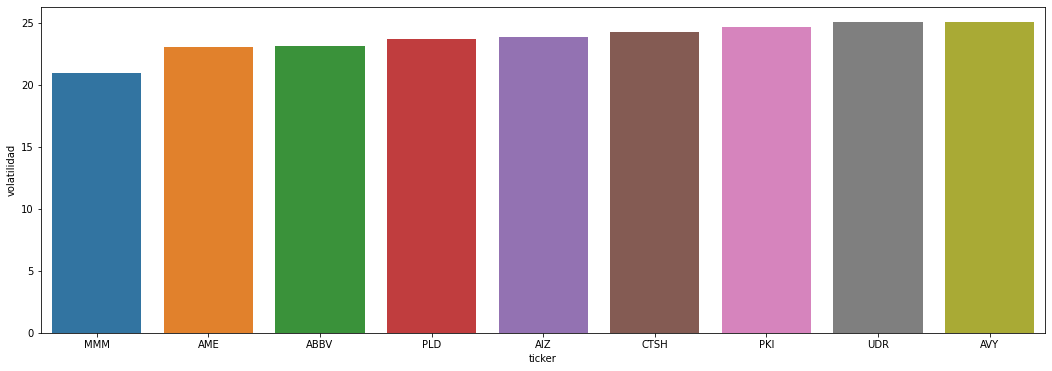

In [31]:
plt.figure(figsize=(18,6))
sns.barplot(nombres,numeros,data=definitivo)

RTA: Para mi estas son las 9 mejores empresas para invertir debido a que son las de mas baja volatilidad por ende las de mejor resguardo economico frente a la crisis economica que se esta viviendo mundialmente e incrementa dia a dia, son la mejor opcion en un momento de bear market